In [66]:
from utils.postprocessing import *
from utils.visualisation import *

# Postprocessing
Let's start by importing the simulation runned in the flat ground and visualise some trace

In [67]:
BAG_FOLDER = '/home/francesco/Desktop/carino/vaevictis/data/'

In [68]:
files = glob.glob(BAG_FOLDER + '/flat/**.bag')

In [69]:
data = files2dfs(files)

In [70]:
%matplotlib notebook

In [71]:
map_name, df = data[0]

<IPython.core.display.Javascript object>


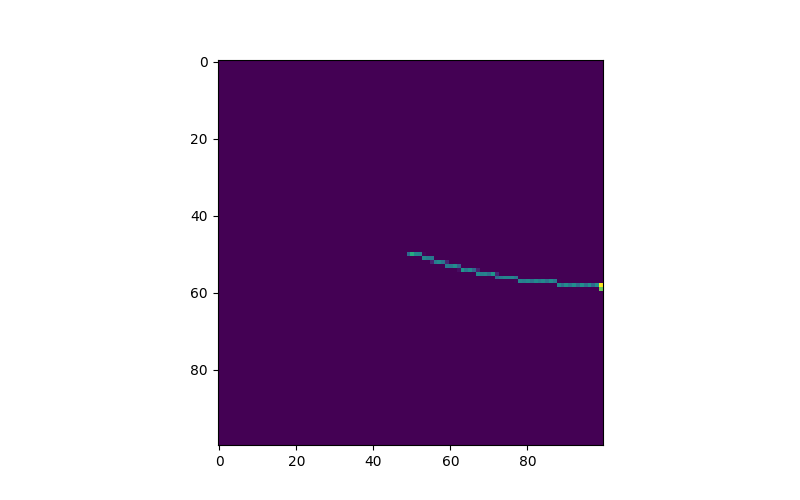

In [72]:
world, X, Y = create_trace_world(df)
create2dtrace(world)

<IPython.core.display.Javascript object>


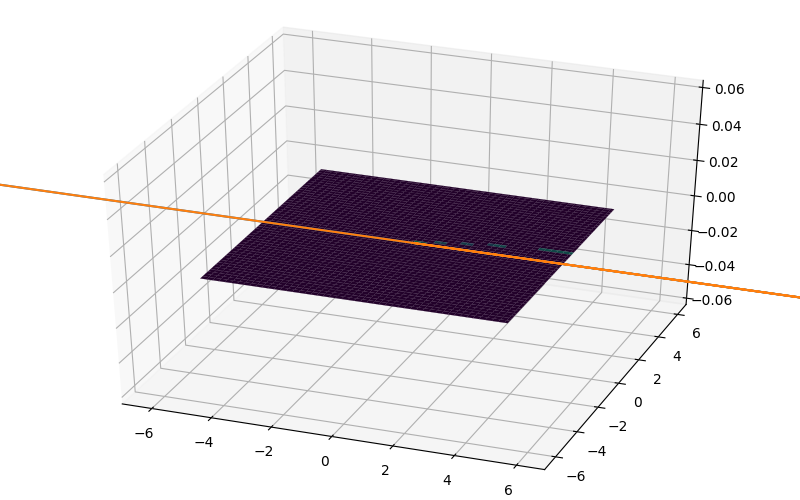

In [73]:
create3dtrace(world, X, Y, map_name)

## Features
We have to first find out median distance for each step

In [132]:
def get_np_poses_df(df):
    x = df.pose__pose_position_x
    y = df.pose__pose_position_y
    z = df.pose__pose_position_z
    
    positions = np.column_stack([x, y, z])
    
    
    x = df.pose__pose_orientation_x
    y = df.pose__pose_orientation_y
    z = df.pose__pose_orientation_z
    w = df.pose__pose_orientation_w
    
    orientations = np.column_stack([x, y, z, w])

    
    return np.column_stack([positions, orientations])

In [133]:
poses = get_np_poses_df(df)

In [134]:
poses.shape

(4382, 7)

In [135]:
poses[0], poses[1]

(array([-1.77088255e-04,  1.90615774e-05,  4.98582637e-01,  1.61612767e-02,
         9.99866403e-01,  2.44748401e-03, -2.92874092e-01]),
 array([-1.84330026e-04,  2.03322744e-05,  4.97968708e-01,  1.56776748e-02,
         9.99874361e-01,  2.33941523e-03, -2.92927950e-01]))

In [136]:
a = np.arange(10)

In [142]:
poses1 = poses
poses2 = np.roll(poses, -1, axis=0)

In [143]:
poses1[0], poses2[0]

(array([-1.77088255e-04,  1.90615774e-05,  4.98582637e-01,  1.61612767e-02,
         9.99866403e-01,  2.44748401e-03, -2.92874092e-01]),
 array([-1.84330026e-04,  2.03322744e-05,  4.97968708e-01,  1.56776748e-02,
         9.99874361e-01,  2.33941523e-03, -2.92927950e-01]))

In [158]:
diff = poses1 - poses2
diff = diff[:len(diff) - 1]

In [169]:
def make_diff_pos_plot(time_steps):
    poses1 = poses
    poses2 = np.roll(poses, -time_steps, axis=0)
    diff = poses1 - poses2

    diff = diff[:len(diff) - time_steps]
    
    for idx in range(diff.shape[1]):
        fig = plt.figure()
        plt.plot(np.arange(diff.shape[0]), diff[:,idx])
        plt.legend(str(idx))
        plt.show()

<IPython.core.display.Javascript object>


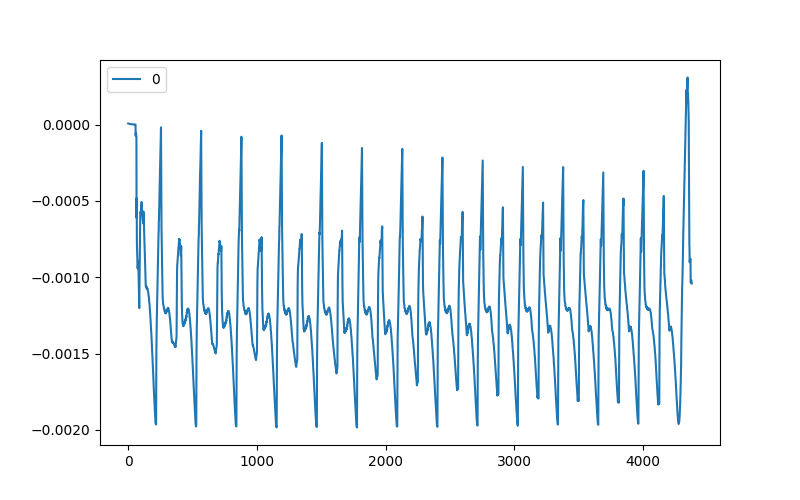

<IPython.core.display.Javascript object>


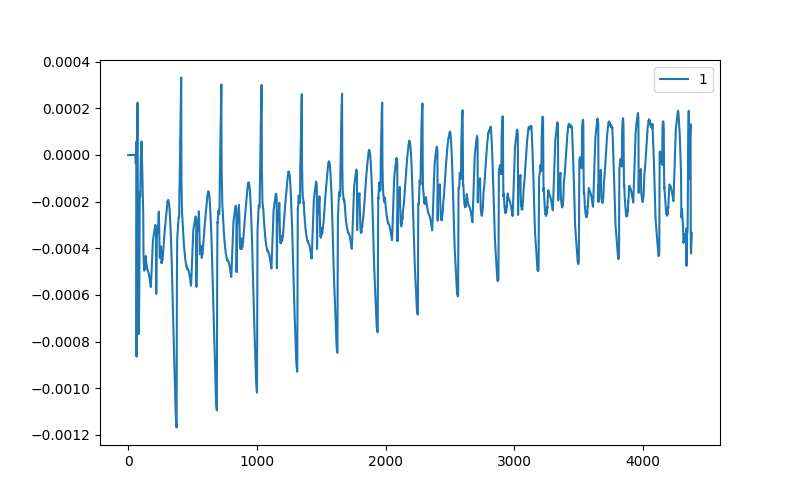

<IPython.core.display.Javascript object>


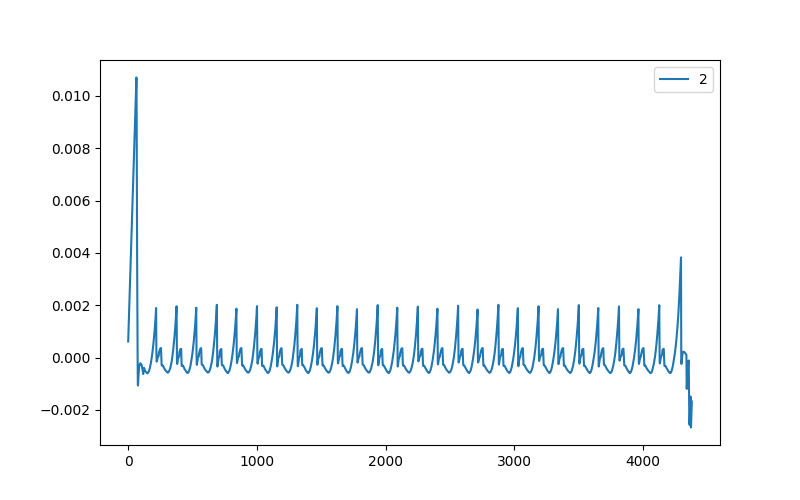

<IPython.core.display.Javascript object>


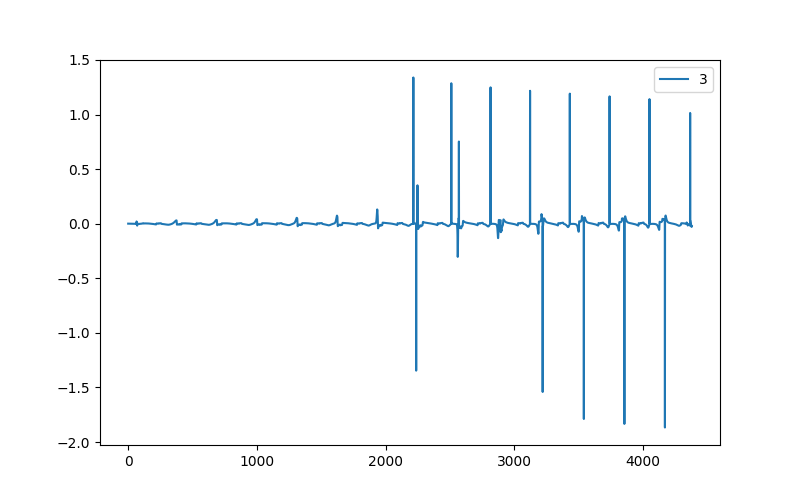

<IPython.core.display.Javascript object>


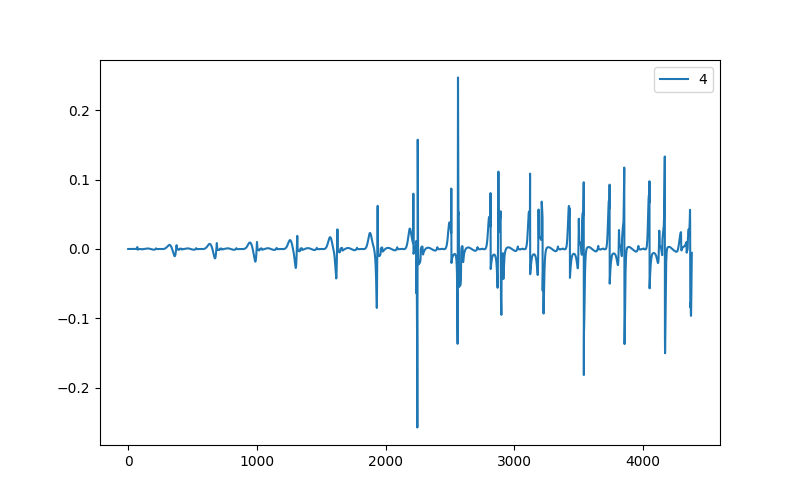

<IPython.core.display.Javascript object>


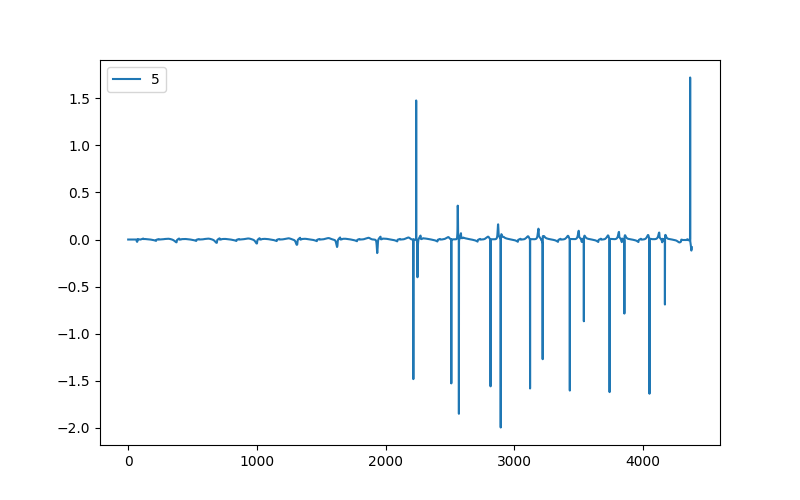

<IPython.core.display.Javascript object>


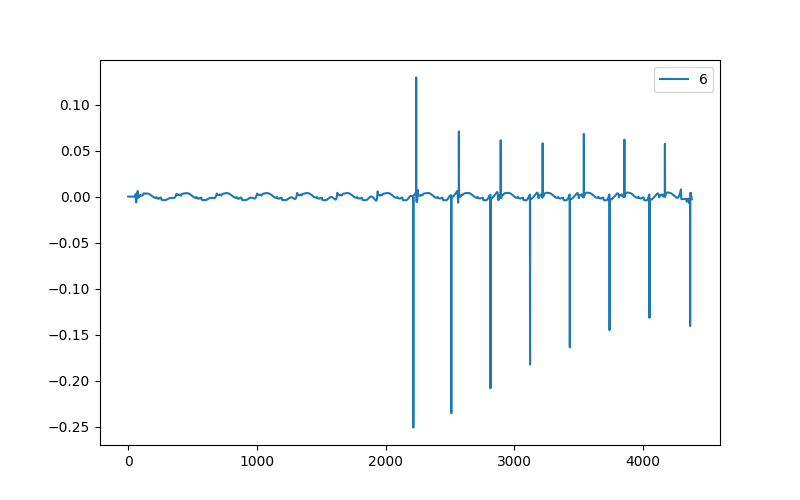

In [170]:
make_diff_pos_plot(1)

In [98]:
x, x_ = poses[0][0], poses[0][3]
x1, x1_ = poses[1][0], poses[1][3]

In [100]:
np.array([x, x_]) - np.array([x1, x1_])

array([7.24177059e-06, 4.83601869e-04])

In [79]:
np.std(positions, axis=0)

array([0.72412042, 1.64612546, 0.03393825])

In [80]:
def get_median(df):
    x = df.pose__pose_position_x
    y = df.pose__pose_position_y
    z = df.pose__pose_position_z

In [ ]:
for bag in files2bags(files):
    for topic, msg, t in bag.read_messages():
        print(topic, msg, t)